In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn
import matplotlib.pyplot as plt

In [9]:
TRAIN_DATASET_PATH = 'pred.csv'
df_train = pd.read_csv(TRAIN_DATASET_PATH, decimal=',',dtype={'zak_name':'string'})
df_train.columns

Index(['zay_nom', 'zak_name', 'price', 'price_sogl', 'price_win', 'status',
       'city', 'memb_stavka', 'date_stavka_add', 'memb_UTC', 'zak_inn',
       'memb_inn', 'memb_name'],
      dtype='object')

In [10]:
df_train.dtypes

zay_nom              int64
zak_name            string
price              float64
price_sogl         float64
price_win          float64
status              object
city                object
memb_stavka        float64
date_stavka_add     object
memb_UTC             int64
zak_inn              int64
memb_inn             int64
memb_name           object
dtype: object

In [11]:
all_data = df_train.reset_index(drop=True)
print(f'all_data size is : {all_data.shape}')
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(
    all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
missing_data

all_data size is : (748, 13)


,Missing Ratio
price_win,49.331551


In [12]:
TARGET_NAME = 'memb_stavka'
SELECTED_FEATURE_NAMES =['price']
len(df_train)

748

In [13]:
zay=df_train['zay_nom'].unique()
pr=[]
for i in range(len(df_train['memb_stavka'])):
    pr.append(df_train['memb_stavka'][i]/(df_train['price'][i]))
#mid=sum(pr)/len(df_train['memb_stavka'])
mid=pd.DataFrame(sorted(pr))
pr_stav=mid[:int(len(mid)/2)].median()[0]
len(zay)

164

Text(0.5, 1.0, 'График зависимости количества выигрышей от снижения ставки')

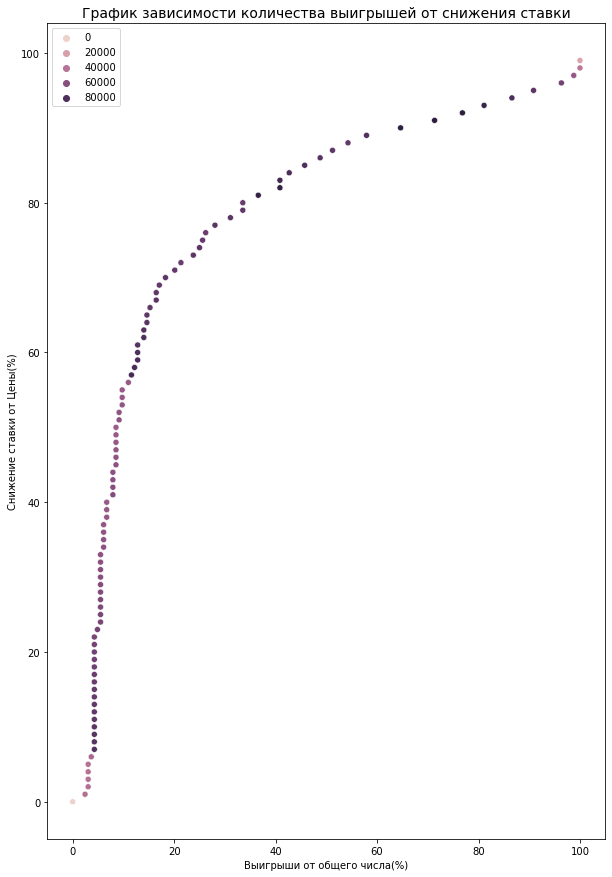

In [14]:
gr_pr=[]
gr_c=[]
gr_st=[]
for j in range(0,100,1):
    count=0
    profit=[]
    pr_stav=(j+1)/100
    for i in zay:
        stavka=df_train.loc[df_train['zay_nom']==i]['price'].mean()*pr_stav
        bs=df_train.loc[df_train['zay_nom']==i]['memb_stavka'].min()
        if stavka<bs:
            profit.append(stavka)
            count+=1
        else:
            profit.append(0)
    gr_pr.append(int(sum(profit)))
    gr_c.append(count/(len(zay)/100))
    gr_st.append(100-pr_stav*100)
plt.figure(figsize=(10, 15))
chart=seaborn.scatterplot(x=gr_c,y=gr_st,hue=gr_pr)
chart.set_xlabel('Выигрыши от общего числа(%)')
chart.set_ylabel('Снижение ставки от Цены(%)')
chart.set_title('График зависимости количества выигрышей от снижения ставки', fontsize=14)

In [211]:
# Резюме: Снижение ставки от цены для успешного участия в тендере должено составлять не менее 80%, 
# при этом  вероятность выигрыша составляет 40%

#### Определение возможности, направления и перспектив определения категории тендера

In [ ]:
X = df_train[SELECTED_FEATURE_NAMES]
y = df_train[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [ ]:
model = RandomForestRegressor(n_estimators=20,n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
r2_score(y_test, model.predict(X_test))

In [15]:
TRAIN_DATASET_PATH = '2_.csv'
df_train = pd.read_csv(TRAIN_DATASET_PATH, decimal=',')
df_train.columns

Index(['Запрос: РегистрСведений.БуферТендеров (Записей в результате: 1 000)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27'],
      dtype='object')

In [147]:
df=pd.DataFrame()
df['tittle']=df_train['Unnamed: 10'].apply(str)
df['def']=df_train['Unnamed: 10'].apply(str)
df['tittle']=df['tittle'].astype(str).apply(lambda x: x[:x.find('\n')].strip())
df['def']=df_train['Unnamed: 10'].astype(str).apply(lambda x: x[x.find('\n')+1:x.find('\n',x.find('\n')+1)].strip())

In [148]:
df['tittle'].astype(str).str.find('\n').astype(int)
print(df['tittle'][100])
print(df['def'][100])

Обучение по программе: "Основы промышленной безопасности А.1". Обучение по программе: "Эксплуатация опасных производственных объектов, на которых используются сосуды, работающие под  избыточным давлением Б.8.3".
Оказание услуг по повышению квалификации сотрудников ЦОИ "Энергия" ФСО Росии. Наименование товара (работы, услуги)КоличествоЦена за ед. руб.Стоимость, руб.


In [151]:
df['tittle'].sum()

['Наименовани',
 'Обучение',
 'по',
 'пожарно-техническому',
 'минимуму',
 'Обучение',
 'по',
 'пожарно-техническому',
 'минимуму',
 'Обучение',
 'по',
 'пожарно-техническому',
 'минимуму',
 'Обучение',
 'по',
 'пожарно-техническому',
 'минимуму',
 'Обучение',
 'по',
 'пожарно-техническому',
 'минимуму',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Дистанционное',
 'обучение',
 'Охрана',
 'труда',
 '0--',
 'ч',
 '№00',
 '00_',
 '00_',
 'Оказание',
 'образовательной',
 'услуги',
 'по',
 'проведению',
 'вебинара',
 'по',
 'программе',
 '«Актуальные',
 'вопросы',
 'подтверждения',
 'соотве

In [150]:

df['tittle']=df['tittle'].astype(str).apply(lambda x: [i.translate({ord(j): None for j in '.,:()1234567890"'}) for i in x.split()])

In [154]:
def counter(list_element):
    count = {}
    for element in list_element:
        if count.get(element, None):
            count[element] += 1
        else:
            count[element] = 1
    sorted_values = sorted(count.items(), key=lambda tpl: tpl[1], reverse=True)
    return dict(sorted_values)
bb=counter(df['tittle'].sum())

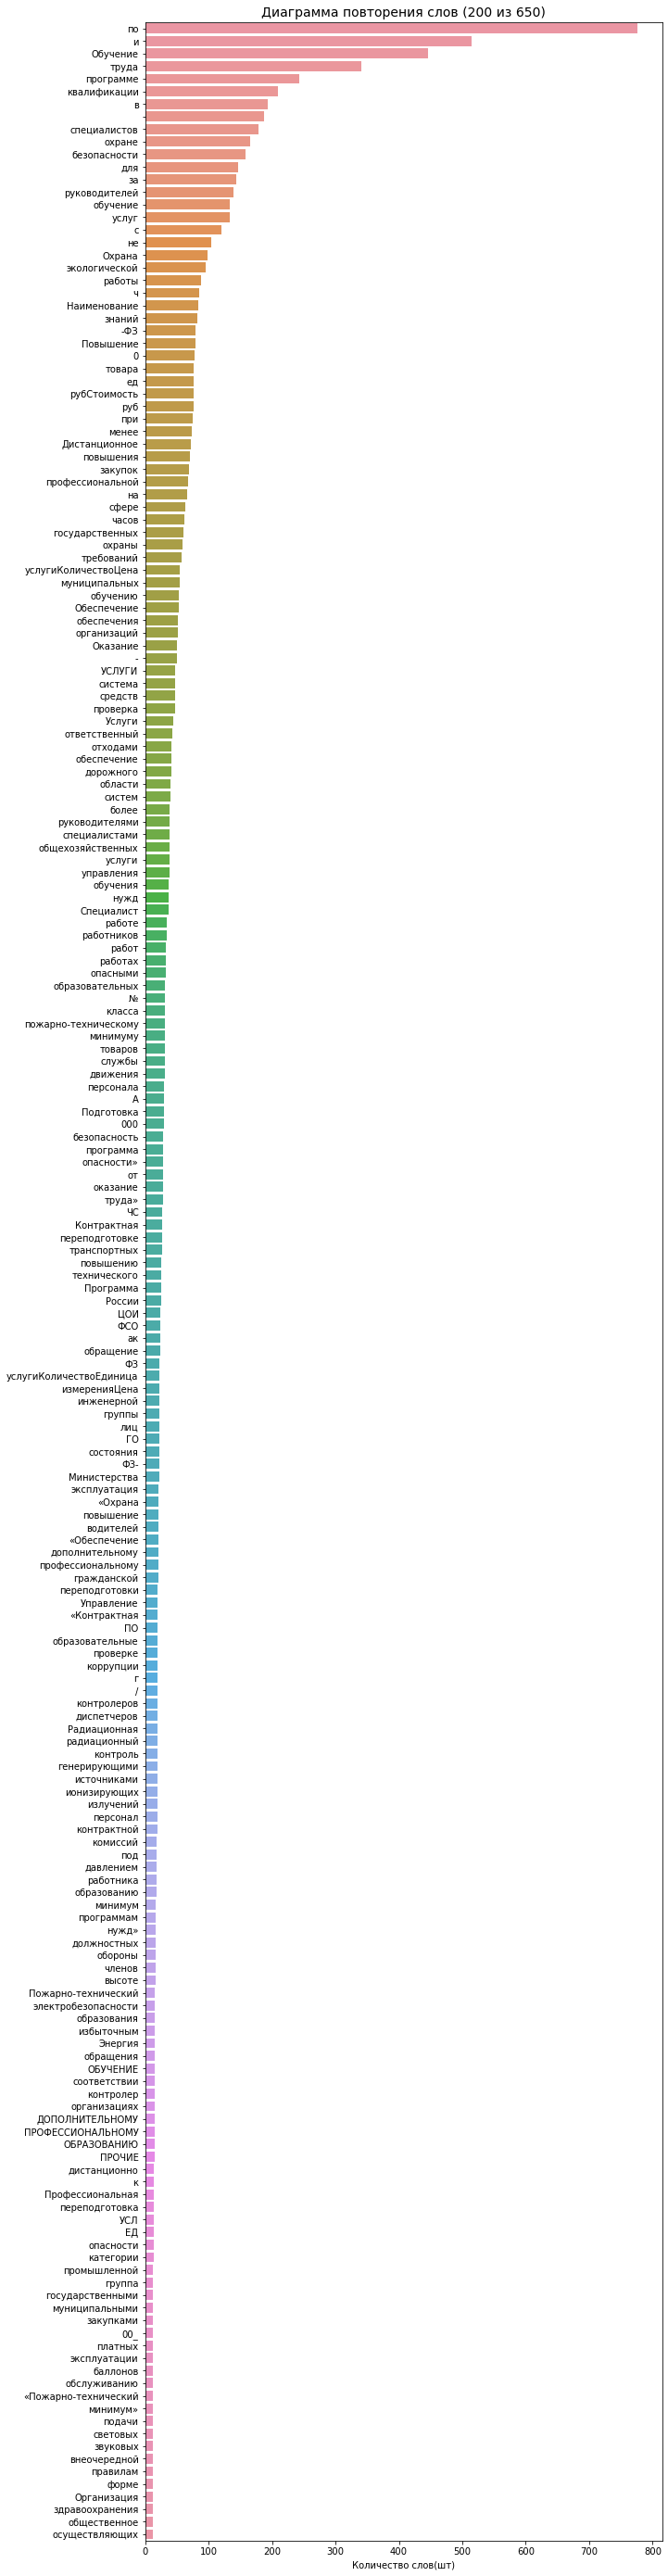

In [207]:
plt.figure(figsize=(10, 50))
chart = seaborn.barplot(y=list(bb.keys())[:200], x=list(bb.values())[:200])
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Диаграмма повторения слов (200 из 650)', fontsize=14)
chart.set_xlabel('Количество слов(шт)')
plt.show()

In [177]:
bb.keys()
len(list(bb.values()))

659

In [ ]:
# Для реализации определения категории требуется очистка полученного списка от не связанной с категориями значениями. 
# Далее, распределить слова по категориям. Категория будет определяться по наибольшему совпадению.